# Testing with Kaggle Dataset

Dataset I Used <a href=https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer> fer-2013 <a/>

In [1]:
#import the required modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time

from deepface import DeepFace
from fer import FER

file_path = "fer-2013/test"

## Testing fer library

In [6]:
def visualize():
    
    moods = [f for f in listdir(file_path)]
    
    sample_images = []
    
    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 4), dpi=100)
    
    for idx, mood in enumerate(moods):
        sample = listdir(f"{file_path}/{mood}")[5]
        
        
        img = cv2.imread(f"{file_path}/{mood}/{sample}")
        ax[idx//4, idx%4].imshow(img)
        ax[idx//4, idx%4].set_title(mood)
        
    plt.tight_layout()
    

def read_data(mood):

    path = f"{file_path}/{mood}"
    
    return [f for f in listdir(path) if isfile(join(path, f))]
    

def analyze_fer(mood, images):
    
    n_img = len(images)
    emo_detector = FER(mtcnn=True)
    
    results = []

    for idx, image in enumerate(images):
        img = cv2.imread(f"{file_path}/{mood}/{image}")
        
        dominant_emotion, emotion_score = emo_detector.top_emotion(img)
        
        # if fer couldn't find the face use deepface
        # because it has a feature that we can enforce altough it can't find a face
        if dominant_emotion == None:
            print("using deepface")
            result = DeepFace.analyze(img, actions = ['emotion'], enforce_detection=False, silent=True)
            results.append(result[0]["dominant_emotion"])
           
        else:
            results.append(dominant_emotion)
        
        if idx%100 == 0:
            print(f"progress: {idx}/{n_img}")
        
    return results


def accuracy(mood, results):
    
    n = len(results)
    correct = 0
    
    for emotion in results:
        
        if mood == emotion:
            correct += 1
            
    
    return correct / n

def report(labels, preds):

    cm = confusion_matrix(test_label,preds)
 
    # Plot the confusion matrix.
    plt.figure(figsize=(6,5), dpi=120)
    sns.heatmap(cm, annot=True,
                xticklabels=moods,
                yticklabels=moods, fmt="g", cmap="Blues")

    plt.title("Confusion Matrix")
    plt.xlabel("Predictions")
    plt.ylabel("True Labels")

    print(classification_report(test_label, preds))
    plt.show()

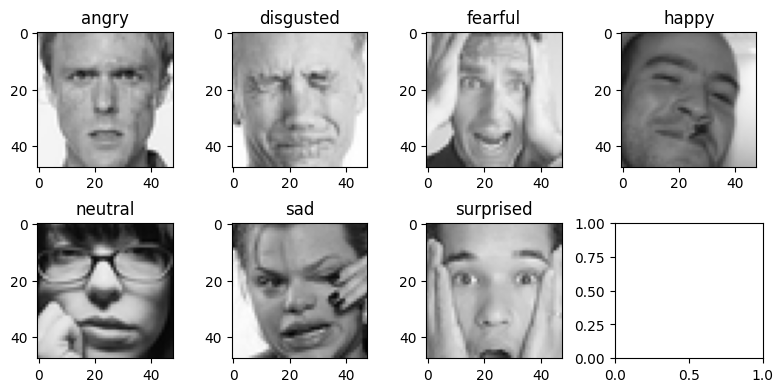

In [7]:
visualize()

### Testing for all moods

In [5]:
moods = [f for f in listdir(file_path)]
mood_mapping = {"angry":"angry", "disgusted":"disgust", "fearful":"fear",
                      "happy":"happy", "neutral":"neutral", "sad":"sad", "surprised":"surprise"}

fer_scores = {}
test_label = []
fer_preds = []

start = time.time()

for mood in moods:
    images = read_data(mood)
    test_label += [mood_mapping[mood] for _ in range(len(images))]
    
    results = analyze_fer(mood, images)
    fer_preds += results

    score = accuracy(mood_mapping[mood], results)
    fer_scores[mood] = score
    
    print(f"{mood} emotion is done!")
    
took = time.time() - start

progress: 0/958
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
progress: 100/958
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
progress: 200/958
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
progress: 300/958
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface


using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
progress: 1000/1774
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
progress: 1100/1774
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
progress: 1200/1774
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
progress: 1300/1774
using deepface
using deepface
using

progress: 1100/1247
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
progress: 1200/1247
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
sad emotion is done!
progress: 0/831
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
progress: 100/831
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using deepface
using

### Results

In [6]:
took

399.85536456108093

In [7]:
fer_scores

{'angry': 0.44467640918580376,
 'disgusted': 0.0990990990990991,
 'fearful': 0.2255859375,
 'happy': 0.7294250281848929,
 'neutral': 0.5174371451743714,
 'sad': 0.34643143544506816,
 'surprised': 0.4645006016847172}

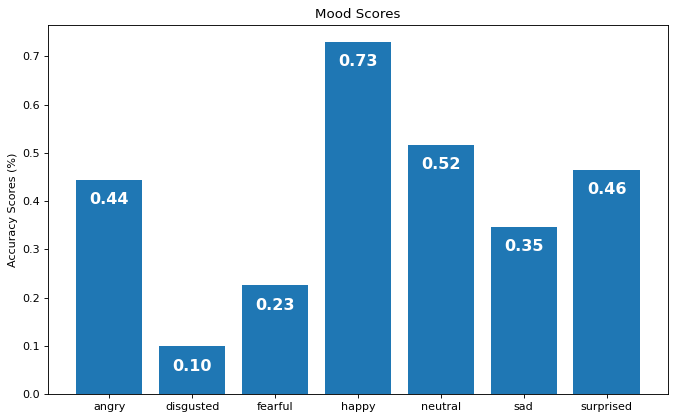

In [7]:
plt.figure(figsize=(10, 6), dpi=80)

plt.bar(fer_scores.keys(), fer_scores.values())
plt.title("Mood Scores")

plt.ylabel("Accuracy Scores (%)")

# plt.show()

for idx, value in enumerate(fer_scores.values()):
    plt.text(idx, value-.05, f"{value:.2f}", fontsize="x-large", ha="center", weight="bold", color="white")

              precision    recall  f1-score   support

       angry       0.37      0.44      0.40       958
     disgust       0.65      0.10      0.17       111
        fear       0.31      0.23      0.26      1024
       happy       0.69      0.73      0.71      1774
     neutral       0.37      0.52      0.43      1233
         sad       0.41      0.35      0.38      1247
    surprise       0.66      0.46      0.54       831

    accuracy                           0.48      7178
   macro avg       0.49      0.40      0.41      7178
weighted avg       0.48      0.48      0.47      7178



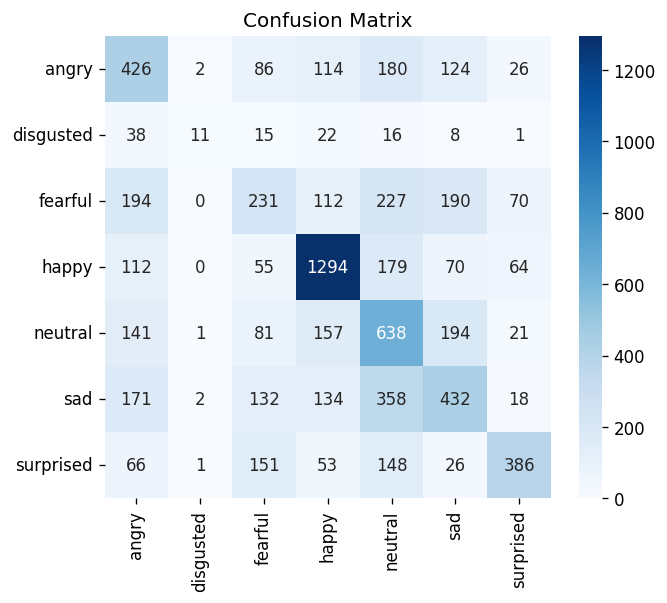

In [8]:
report(test_label, fer_preds)